
$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\tv}{\mathbf{t}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Im}{\mathbf{I}}
$
### ITCS6155

# Linear Model


**Supervised Learning**: 

$$ f: \mathcal{X} \rightarrow y $$


Supervised learning can be formulated as above. When we want to predict tomorrow's temparature, for instance, we might look for the data that we can use as an input $\mathcal{X}$ such as humidity, history of temparature changes, air pressure, and vapor pressure along with the output (today's temparature) $y$. Once we recorded or found the data, we can build a table as follows. 

humidity (%) | last year temparature (&ordm;F) | yesterday's air pressure (inHG) | vapor pressure (inHG) | **Today's Temp** (&ordm;F)
---|---|---|---|---
23 | 72 | 30.12 | 0.79 | 76
15 | 82 | 29.32 | 0.68 | 81
 | | ... | |


Here, we note that the output is *today's* not *tomorrow's* temparature. 
As we discussed in the first lecture, machine learning model *learns* from data or experiences. 
This learning is called as *"training"* and the data used for training is called *training samples*. 
In this example, the table is training samples that we will feed in to our models. 
To maintain the right relation between input data and output prediction, however, the humidity and pressure values from yesterday are paired with the output, today's temparature. 

Once you have data to play with, now you can apply learning algorithms ($f$) to find parameters. 
This model with the learned parameters is *hypothesis*, and will be your model for prediction.
From today's measurements, applying the hypothesis model can simply generate the prediction output. 
When the training is successful, it is more likely to have a good estimation. 


## Linear Model

Linear model can be defined as a Euclidean dot product between two vectors: 

$$
\begin{align}
  f(\xv; \wv) &= \wv^\top \xv = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

where $\wv$ is a weight vector and $\xv$ is an input vector. 
When it is a one dimensional vector, it represents a straight line, so it is called *linear*. 

Assume that we have $N$ data observations, $\xv_i$ and target outputs, $t_i$, for $i = 1, \cdots, N$.
The simpliest model that we can think of is constant model, $f(\xv) = c$, where $c$ is any scalar. 
In this case, we have the zero weights in the linear model. 

The linearity in the parameter $\xv$ make the optimization based on deravatives to solvable analytically. 
The model limits the complexity so its representation is also limited. However, it can prevent possible overfitting with the simple modeling, especially when you have sparsely sampled data.


### Dot Product

The dot product, also known as inner product or scalar product, computes the product of pair of elements in each vector and the summation of the products. It is geometrically interpreted as a cosine between two vectors as well.
Thus, it can be written as


$$
    \wv^\top \xv = \| \wv \| \| \xv \| \cos(\theta),
$$

where $\theta$ is the angle between two vectors. 
Thus, when the vectors are unit vectors, the dot product is simply consine of the angle between two vectors. 

![](https://upload.wikimedia.org/wikipedia/commons/3/3e/Dot_Product.svg)
<center>(from wikipedia)</center>


### Regression

The target output $t$ is s real number ($y, t \in \R$) as we discussed in last lecture. Thus, training $f(\xv; \wv)$ generates $y$ values close to the target outputs. We will discuss more about linear regression in next section.


### Classification

Classification has target outputs as discrete values. In case of binary classification, you have two values as target (ie. $t \in \{ -1, 1 \}$). As we know that $y$ can be any real value, we can cap the model to generate discrete values as below:


$$ y = \sign ( f(\xv; \wv) ).$$


### Advantages of Linear Model

- Simple
- Stable
- Avoid Overfitting
- Scalable



# Practice
**Finish this excercise and submit on Canvas.**

Q: Write a python code that create two vectors, $\wv$ and $\xv$ as follows: 

$
\xv = \begin{bmatrix}
         4.0 \\
         2.3 \\
         1.2 \\
         5.8
        \end{bmatrix},  
\wv = \begin{bmatrix}
         0.8 \\
         0.1 \\
         0.53 \\
         0.33
        \end{bmatrix}
$

In [1]:
import numpy as np

x = np.array([4.0, 2.3, 1.2, 5.8])
w = np.array([0.8, 0.1, 0.53, 0.33])

Q: Write a function *linear_model(x, w)* that returns the result of dot product.

In [2]:
def linear_model(x, w):
    return np.dot(x, w)

Q: Pass the $\wv$ and $\xv$ and print the output of the linear model.

In [3]:
dot_val = linear_model(x, w)

dot_val

5.9799999999999995

# Linear Regression

In this note, we solve regression problems using the linear model as follows. 
For instance, we have example data as follows. 
The goal we want to acheive in this problem is to find a best fit on all the data.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
X = np.linspace(0,10, 101)
T = 2 * X  + 4+ np.random.rand(101) * 5

In [6]:
def data_scatter(k=101):
    plt.plot(T[:k], '.')
    plt.xticks(range(0, 101, 20)[:k], range(0, 11, 2)[:k])

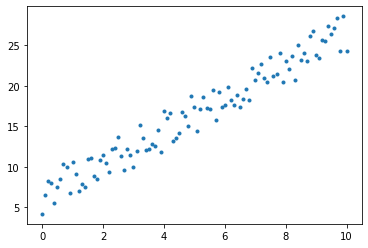

In [8]:
data_scatter()


When we use a linear model, there can be multiple options. One of them, or the simplest solution, can be the avergage value. 

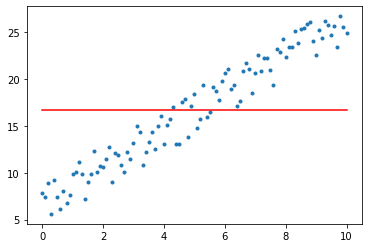

In [7]:
mean = np.mean(T)

data_scatter()
plt.plot([0, 100],[mean, mean], 'r-')

When the data is linear or when we need simple solution, the linear model can suggest better solutions. 
For instance, one dimensional affine model can be written as

$$
f(x; a, b) = a x + b.
$$

Unifying the weight symbol with $w$,
$$
f(x; \wv) =  w_1 x + w_0.
$$

Considering multiple inputs for $x$, we can extend the input $x$ to input vector $\xv$ with dummy input $x_0 = 1$:

$$
\begin{align}
f(\xv; \wv) &=  w_D x_D + \cdots + w_1 x_1 + w_0 \\
            &= \sum_{i=0}^{D} w_i x_i \quad\text{where } x_0 = 1\\
            &= \wv^\top \xv.
\end{align}
$$


#### Error (Cost) Function

When we define $\wv \in \R^D$, the choice of $D$ real numbers can result in the best result. 
Here, the word "*best*" can be vague. Thus, we need to define what *best* means. 
The sum of square error function defines as follows:

$$
E(\wv) = \sum_{i=1}^N \Big( f(\xv_i; \wv_i) - t_i \Big)^2
$$

This error function says that we want to minimize the sum of Euclidean distances between the target values and the model outputs. Here the square term leads the distances are not biased a few samples since sacrificing others with large errors will disturb the objective. 


## Least Squares

The parameter that gives best fit will be

$$
\wv^* = \arg\min_\wv \sum_{i=1}^{N} \Big( f(\xv_i; \wv) - t_i \Big)^2
$$

Since the error funciton is quadratic, the problem can be analytically solved by simply setting derivative with respect to $\wv$ to zero. 
For this, let us prepare data in matrix. 
The target values are collected in matrix $\tv$, and the input samples are in matrix $\Xm$.

$$
\begin{align}
\tv &= [t_1, t_2, \cdots, t_N]^\top \\ 
\\
\wv &= [w_0, w_1, \cdots, w_D]^\top \\
\\
\Xm &= \begin{bmatrix}
    x_{10} & x_{11} & x_{12} & \dots  & x_{1D} \\
    x_{20} & x_{21} & x_{22} & \dots  & x_{2D} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{N0} & x_{N1} & x_{N2} & \dots  & x_{ND}
\end{bmatrix}
\end{align}
$$
where the first column is one's, $\xv_{*0} = [1, 1, \dots, 1]^\top$.

With this matrix, $f(\xv; \wv)$ can be written in matrix form as:
$$
f(\xv; \wv) = \Xm \wv.
$$
Thus, the error function can be
$$
\begin{align}
E(\wv) &= \sum_{i=1}^N \Big(f(\xv_i; \wv_i) - t_i \Big)^2 \\
            \\
            &= (\Xm \wv - \tv)^\top (\Xm \wv - \tv) \\ 
            \\
            &= \wv^\top \Xm^\top \Xm \wv - 2 \tv^\top \Xm \wv + \tv^\top \tv 
\end{align}
$$
because $\tv^\top \Xm \wv$ is a scalar, so symmetric. 

Now, let us do the derivative. 
$$
\begin{align}
\frac{\partial E(\wv)}{\partial \wv} &= \frac{\partial (\Xm \wv - \tv)^\top (\Xm \wv - \tv)}{\partial \wv} \\
        \\
        &= \frac{\partial (\wv^\top \Xm^\top \Xm \wv - 2 \tv^\top \Xm \wv + \tv^\top \tv )}{\partial \wv} \\
        \\
        &= \frac{\partial (\wv^\top \Xm^\top \Xm \wv)}{\partial \wv} - 2 \Xm^\top \tv \\
        \\
        &= \Xm^\top \Xm \wv + (\Xm^\top \Xm)^\top \wv - 2 \Xm^\top \tv  \\
        \\
        &= 2 \Xm^\top \Xm \wv - 2 \Xm^\top \tv 
\end{align}
$$

Setting this to zero, 
$$
\begin{align}
 2 \Xm^\top \Xm \wv - 2 \Xm^\top \tv  &= 0\\
\\
\Xm^\top \Xm \wv &= \Xm^\top \tv\\
\\
\wv &= \big(\Xm^\top \Xm\big)^{-1} \Xm^\top \tv
\end{align}
$$



# Practice

Implement the least squares model and apply to the simulated data X and T. 
Consider using **np.linalg.inv** (to inverse a matrix), **np.linalg.solve** (to solve system of linear scalar equations), **np.linalg.lstsq** (least-squares solution to a linear matrix equation).
After getting the parameter w, plot the approximation line. 

In [19]:
import numpy as np 

# First creast X1 by adding 1's column to X
N = X.shape[0]
X1 = np.c_[np.ones((N, 1)), X]

# the following line is also valid to insert a column containing 1s
#X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))

# print(X1)
# print(X1.transpose())

# Next, using inverse, solve, lstsq function to get w*
w = np.linalg.inv(X1.transpose().dot(X1)).dot(X1.transpose()).dot(T)

print(w)

[6.72937873 2.00210497]


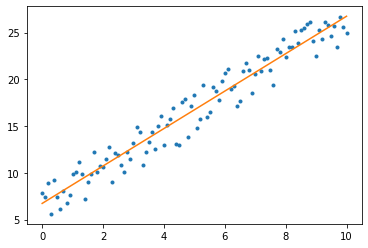

In [20]:
# plot the linear line (w)

y = X1.dot(w)

data_scatter()
plt.plot(y)

## Least Mean Squares (LMS)

Previously we observed that the least squares use all the available data for training or finding the best fit. 
This can be often computationally costly, especially with large data sets. When data is sufficiently large, we can consider *sequential* or *online* learning.
During the online learning process, we introduce a data point one by one, and update the parameters. Using the updated parameters, it makes a new estimation and repeat these steps. 

For this, we start with an initial guess $\wv$ and changes it as it reads more data until it converges. 
When $k$ represents the steps for the repetition,

$$
\wv^{(k+1)} = \wv^{(k)} - \alpha \nabla E_k 
$$

where $E_k$ is the error for the $k$'th sample and $\alpha$ is a learning rate. 
This is called *stochastic gradient descent* or *sequential gradient descent*. 

For the $k$'th sample $\xv_k$, the gradient for the sum-of-squares error is

$$
\begin{align}
\nabla E_k = \frac{\partial E}{\partial \wv^{(k)}} &= \frac{\partial }{\partial \wv^{(k)}}\Big( f(\xv_k; \wv^{(k)}) - t_k \Big)^2 \\
        &= 2 \Big( f(\xv_k; \wv^{(k)}) - t_k \Big) \frac{\partial }{\partial \wv^{(k)}} \Big( f(\xv_k; \wv^{(k)}) - t_k \Big) \\
        &= 2 \Big( {\wv^{(k)}}^\top \xv_k - t_k \Big) \frac{\partial }{\partial \wv^{(k)}} \Big( {\wv^{(k)}}^\top \xv_k - t_k \Big) \\
        &= 2\Big( {\wv^{(k)}}^\top \xv_k - t_k \Big) \xv_k.
\end{align}
$$
This gives the following update rule for each sample:

$$
\wv^{(k+1)} = \wv^{(k)} - \alpha \Big( {\wv^{(k)}}^\top \xv_k - t_k \Big) \xv_k.
$$

# Pratice

Implement the LMS for the simulated sample X, and show the plot

In [21]:
print(X1.shape)
print(w.shape)
print(w.transpose().shape)

(101, 2)
(2,)
(2,)


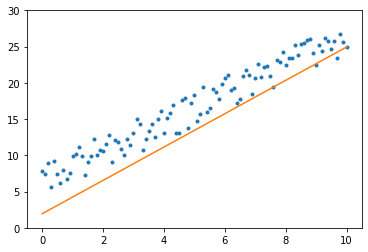

In [22]:
import IPython.display as ipd  # for display and clear_output

# initial weights with random values
w = np.random.rand(X1.shape[1])

# learning rate
alpha = 0.01

fig = plt.figure()

# sequential learning
for k in range(N):
    # online update of weights
    w = w - (alpha * ((X1[k:k+1, 0:2].dot(w.transpose()) - T[k:k+1]).dot(X1[k:k+1, 0:2])))
    
    plt.clf()
    data_scatter(k+1)
    
    # Plot the current model's estimation in a line
    tmpY = X1 @ w
    plt.plot(tmpY)
    plt.ylim([0,30])
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True)